# Impute missing data using forward and backward filling



This notebook shows how we can use the forward and backward filling methods to fill missing data for a time series.

We will work with a monthly retail sales dataset (found [here](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv)).


## Data Set Synopsis

The timeseries is between January 1992 and Apr 2005.

It consists of a single series of monthly values representing sales volumes. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

# Load dataset

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(
    "example_retail_sales_with_missing_data.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

# Drop the unnecessary column
df = df.drop(columns=["Unnamed: 0"])



In [3]:
df.head()

,y
ds,
1992-01-01,146376.0
1992-02-01,147079.0
1992-03-01,159336.0
1992-04-01,163669.0
1992-05-01,170068.0


# Check for missing data

We check for missing data in the target and quantify how many missing values there are.

In [4]:
n_missing = df["y"].isnull().sum()

print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

Number of datapoints missing: 33
Proportion of dataset missing: 11.26%


We plot the time series to see where the data is missing.

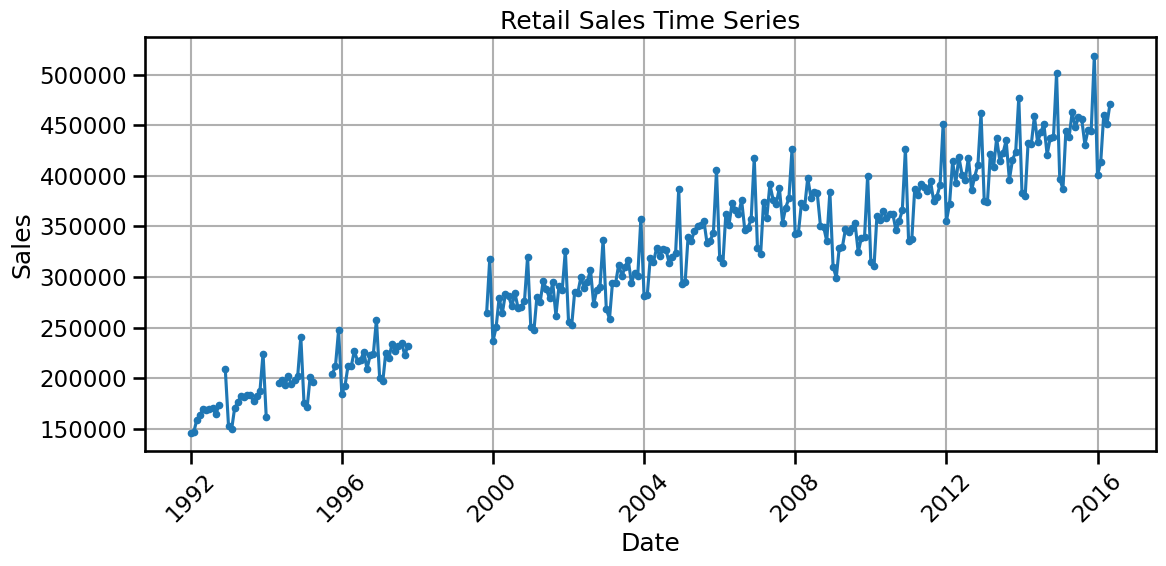

In [5]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'], marker='.')
plt.title('Retail Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Forward fill method (aka. last observation carried forward)

Apply the forward fill method. This method is also known as "last observation carried forward".

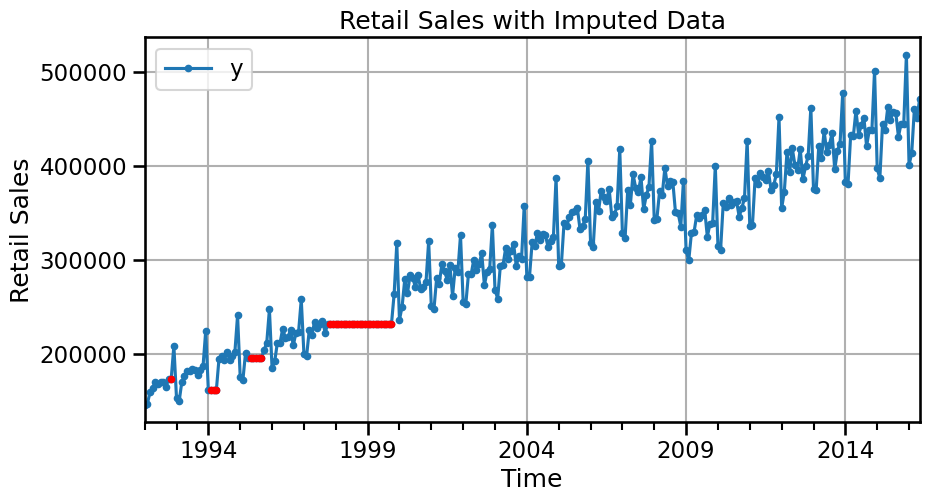

In [15]:
# Drop rows with NaT in index if there are any
df_cleaned = df.dropna()

# Reindex to fill missing datesfreq='MS'( Month Start)
date_range = pd.date_range(start=df_cleaned.index.min(), end=df_cleaned.index.max(), freq='MS')
df_reindexed = df_cleaned.reindex(date_range)

# Apply the forward fill method
df_imputed = df_reindexed.ffill()

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
df_imputed[df_reindexed.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with Imputed Data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")
plt.grid(True)
plt.show()


We now compare this with the backfill method. This method is also known as "next observation carried backwards".

## Backward fill method (aka. next observation carried backwards)

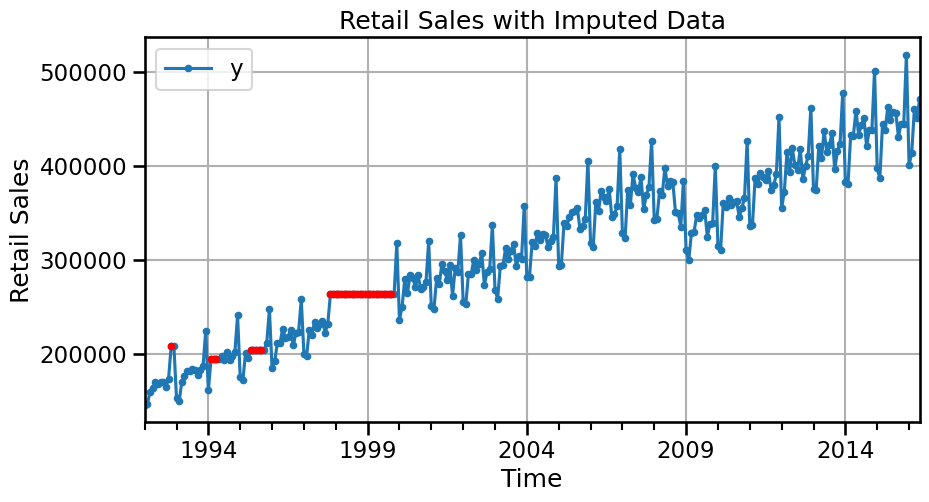

In [16]:
# Apply the forward fill method
df_imputed = df_reindexed.bfill()

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
df_imputed[df_reindexed.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with Imputed Data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")
plt.grid(True)
plt.show()


The above figures show that these methods can distort important structures of the time series (e.g., the shape of a seasonal component) depending on how large the gaps of missing data are. If these gaps are small then the distortions are small, if the gaps are large then the distortions are also large. A gap is small or large relative to structures found in the time series (i.e., the lengths of the seasonal period or steepness of a trend line).

The distortions to the time series created by data imputation can negatively impact the fitting of a model. If the proportion of missing data is small then the impact of these distortions on the fitting of a model should be less and may be tolerable depending on the use case.

One minor advantage of forward filling over backward filling is that it does not leak any data from the future to the imputed data points.  The impact of this depends on how much data has been imputed and may not make a noticeable difference if the size of the missing value gaps is small.

If a dataset has missing data with small gap sizes then forward filling would be a sufficient method to impute missing data without distorting the time series too heavily and ensuring no data leakage is occurring. 

                   y
ds                  
1992-01-01  146376.0
1992-02-01  147079.0
1992-03-01  159336.0
1992-04-01  163669.0
1992-05-01  170068.0
Number of datapoints missing: 33
Proportion of dataset missing: 11.26%


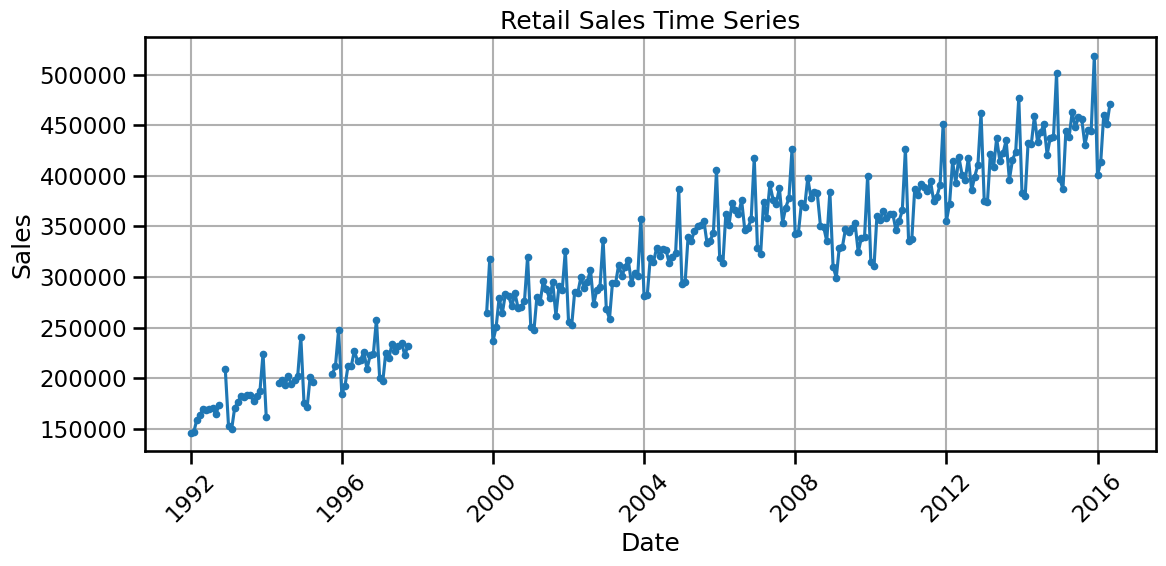

C:\Users\Milan Amrut Joshi\AppData\Local\Temp\ipykernel_24552\1845460345.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  "Pad/Fill": df_reindexed.fillna(method='pad'),


<Figure size 1000x500 with 0 Axes>

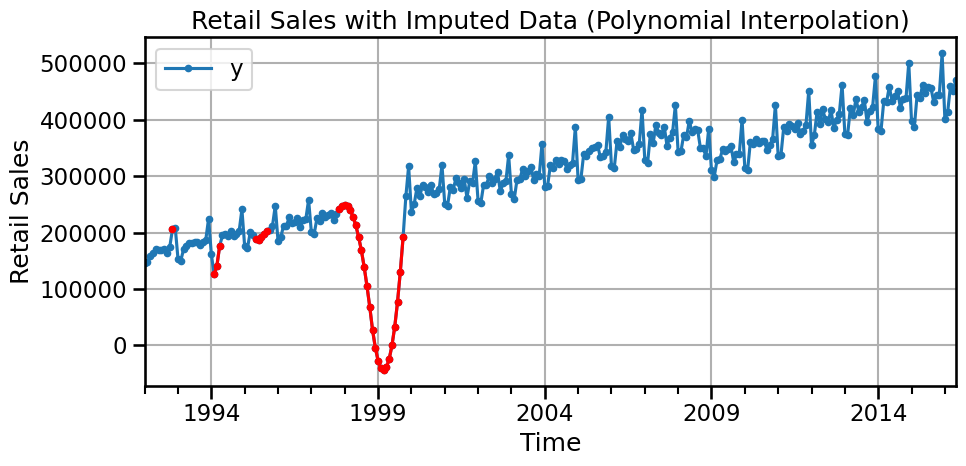

<Figure size 1000x500 with 0 Axes>

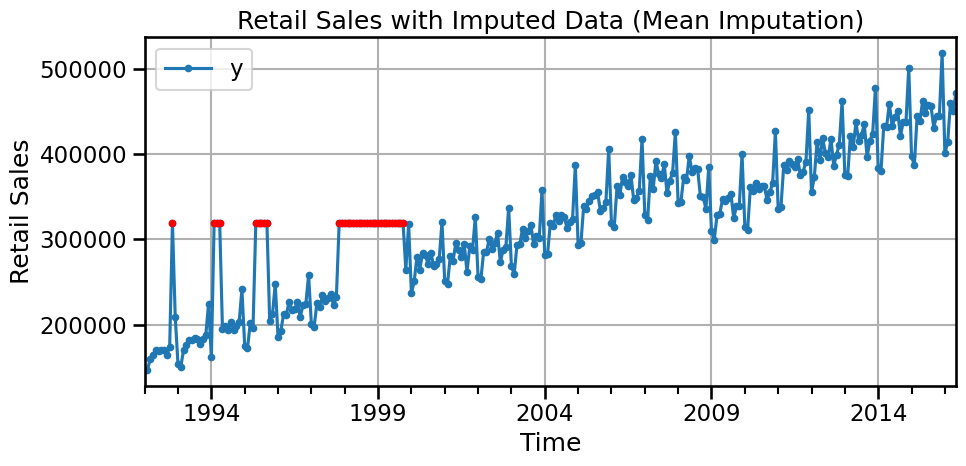

<Figure size 1000x500 with 0 Axes>

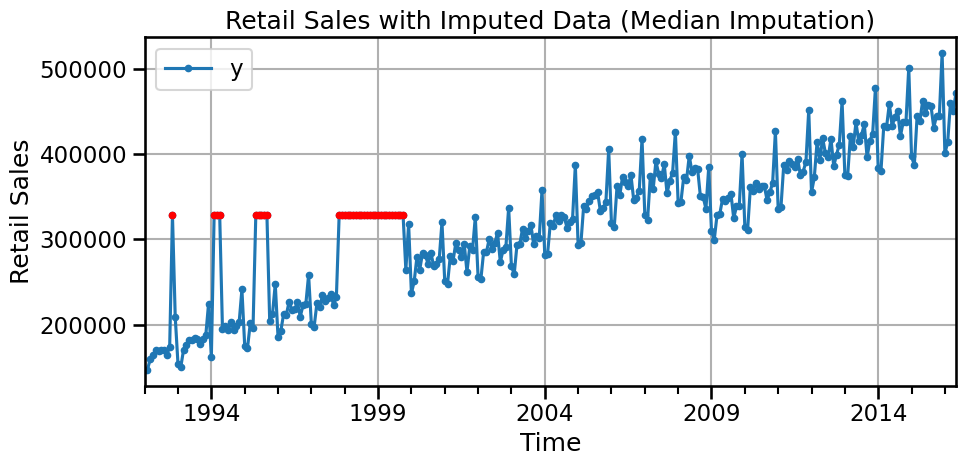

<Figure size 1000x500 with 0 Axes>

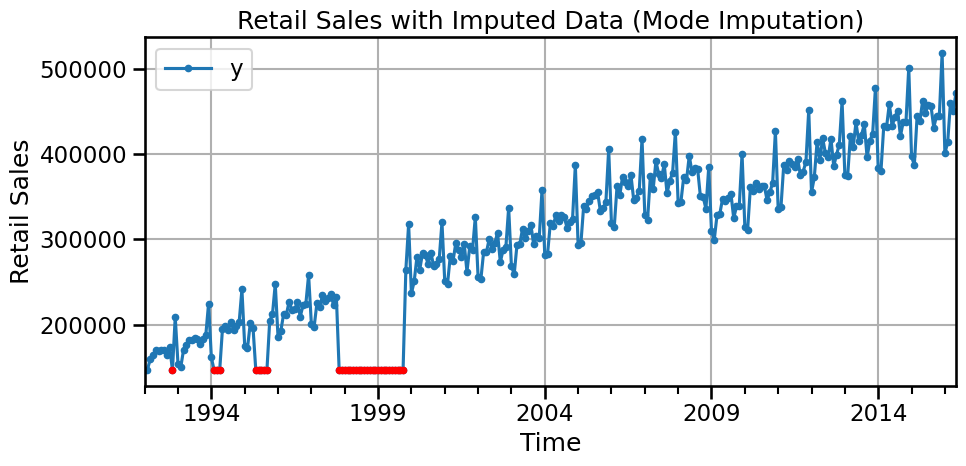

<Figure size 1000x500 with 0 Axes>

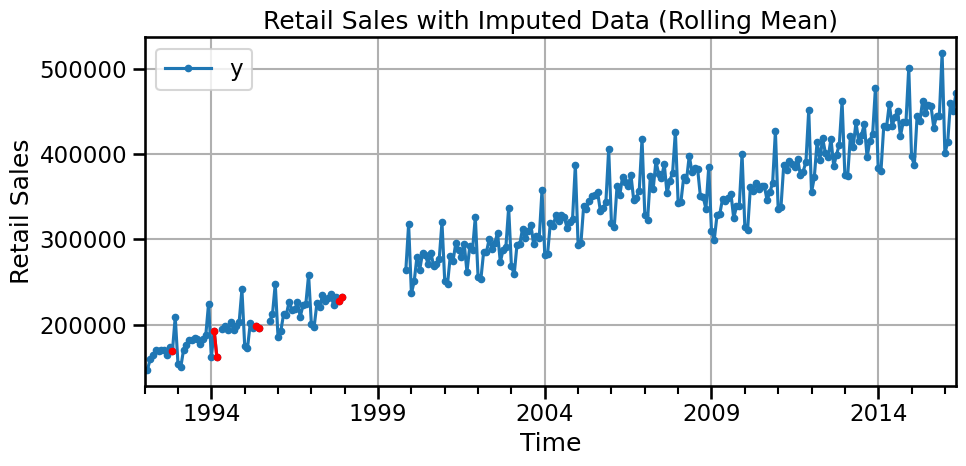

<Figure size 1000x500 with 0 Axes>

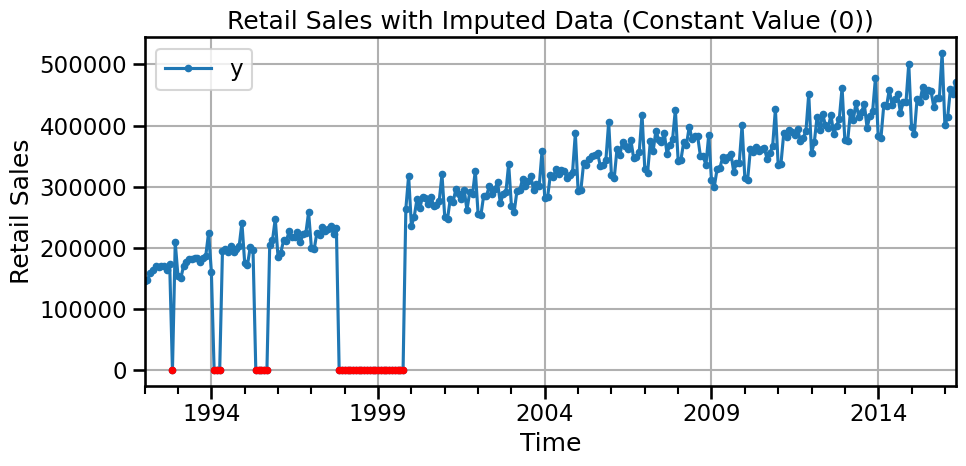

<Figure size 1000x500 with 0 Axes>

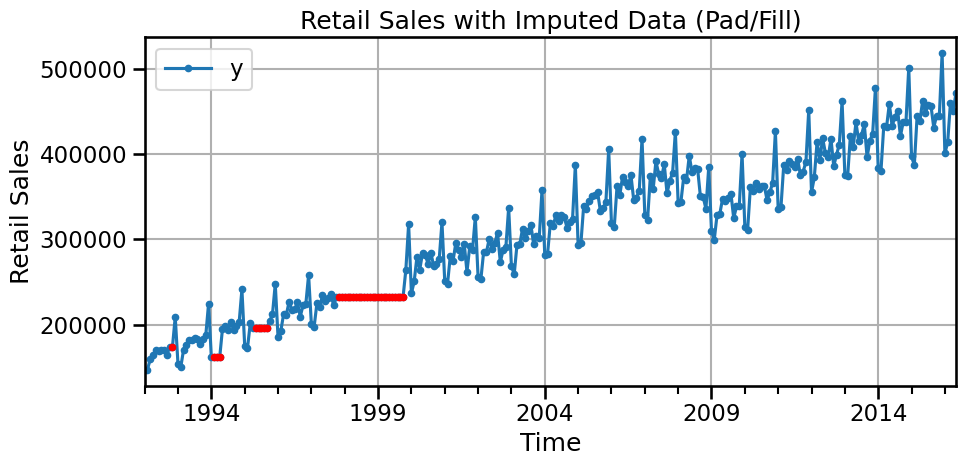

<Figure size 1000x500 with 0 Axes>

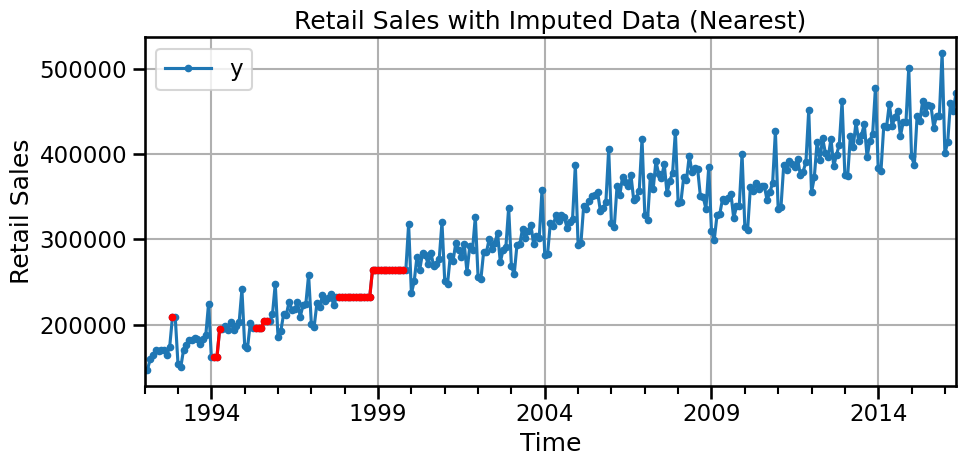

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv(
    "example_retail_sales_with_missing_data.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

# Drop the unnecessary column
df = df.drop(columns=["Unnamed: 0"])

# Display the first few rows
print(df.head())

# Count and display the number of missing values
n_missing = df["y"].isnull().sum()
print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'], marker='.')
plt.title('Retail Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop rows with NaT in index if there are any
df_cleaned = df.dropna()

# Reindex to fill missing dates freq='MS' (Month Start)
date_range = pd.date_range(start=df_cleaned.index.min(), end=df_cleaned.index.max(), freq='MS')
df_reindexed = df_cleaned.reindex(date_range)

# Fill methods
methods = {
    "Polynomial Interpolation": df_reindexed.interpolate(method='polynomial', order=2),
    "Mean Imputation": df_reindexed.fillna(df_reindexed.mean()),
    "Median Imputation": df_reindexed.fillna(df_reindexed.median()),
    "Mode Imputation": df_reindexed.apply(lambda x: x.fillna(x.mode()[0])),
    "Rolling Mean": df_reindexed.fillna(df_reindexed.rolling(window=3, min_periods=1).mean()),
    "Constant Value (0)": df_reindexed.fillna(0),
    "Pad/Fill": df_reindexed.fillna(method='pad'),
    "Nearest": df_reindexed.interpolate(method='nearest'),
}

# Plot the imputed time series for each method
for method, df_imputed in methods.items():
    plt.figure(figsize=[10, 5])
    ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
    df_imputed[df_reindexed.isnull()].plot(ax=ax, legend=None, marker=".", color="r")
    ax.set_title(f"Retail Sales with Imputed Data ({method})")
    ax.set_ylabel("Retail Sales")
    ax.set_xlabel("Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


                   y
ds                  
1992-01-01  146376.0
1992-02-01  147079.0
1992-03-01  159336.0
1992-04-01  163669.0
1992-05-01  170068.0
Number of datapoints missing: 33
Proportion of dataset missing: 11.26%


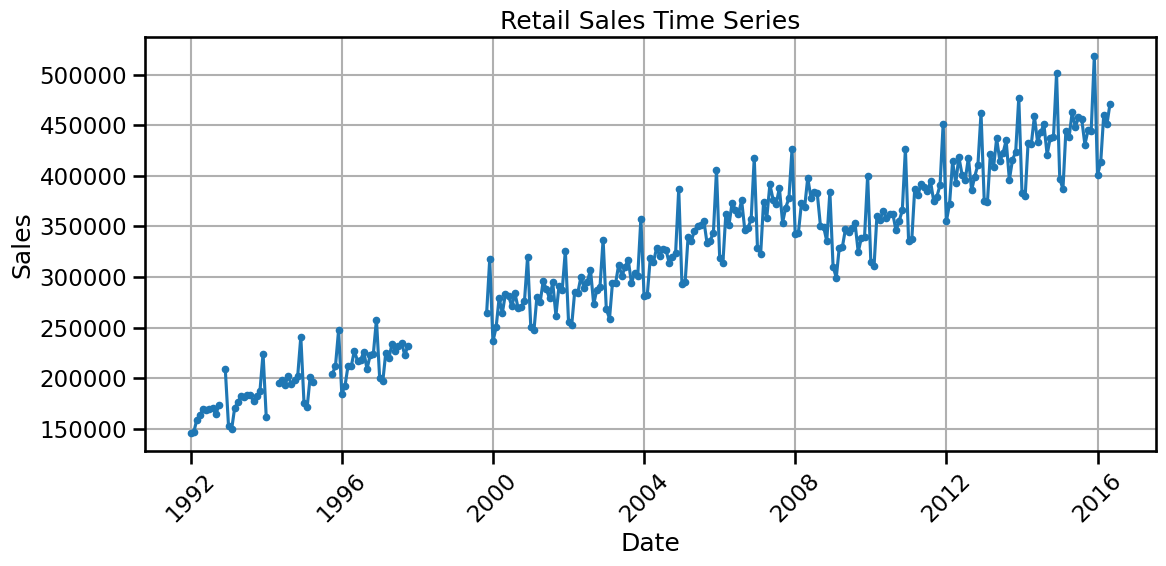

C:\Users\Milan Amrut Joshi\AppData\Local\Temp\ipykernel_24552\1850530323.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  "Pad/Fill": df_reindexed.fillna(method='pad'),


<Figure size 1000x500 with 0 Axes>

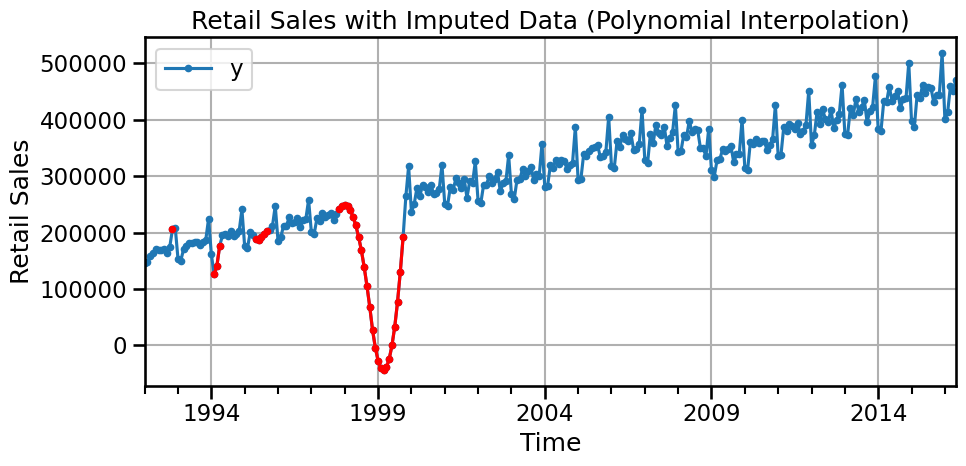

<Figure size 1000x500 with 0 Axes>

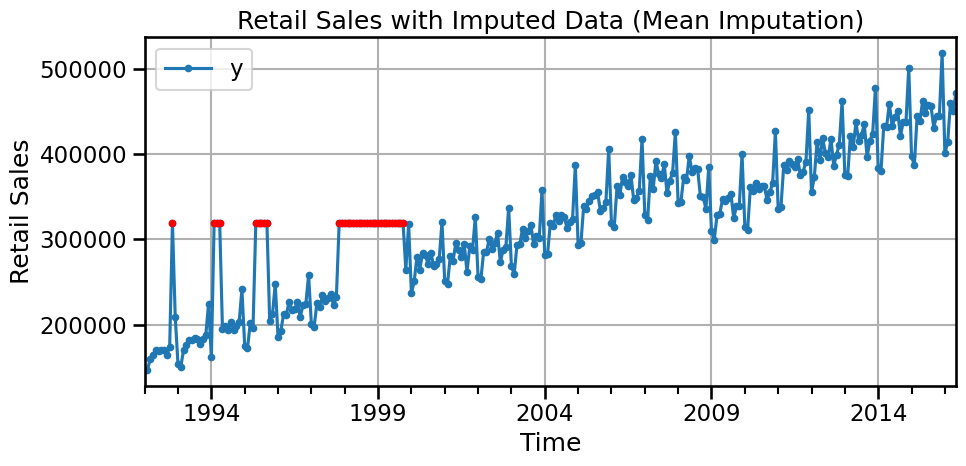

<Figure size 1000x500 with 0 Axes>

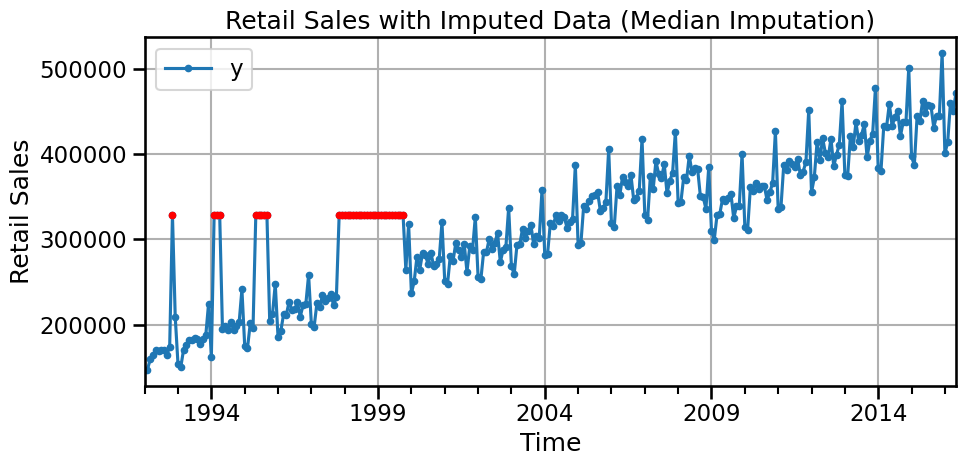

<Figure size 1000x500 with 0 Axes>

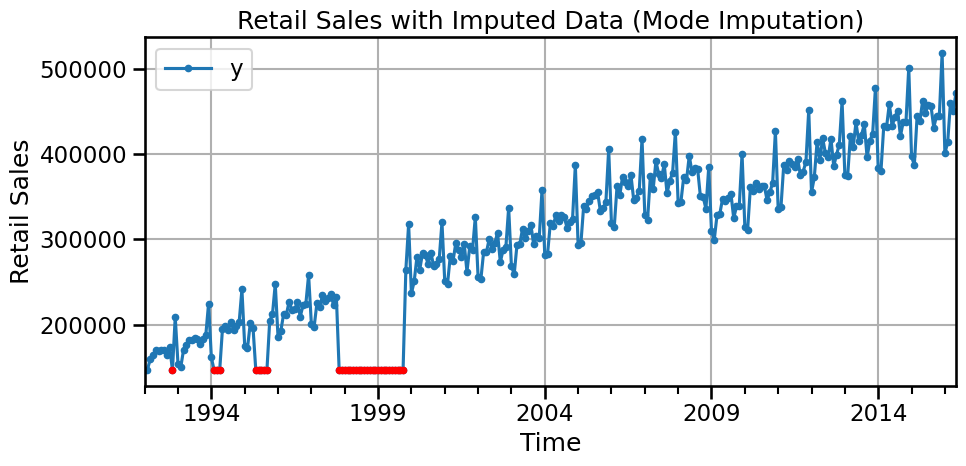

<Figure size 1000x500 with 0 Axes>

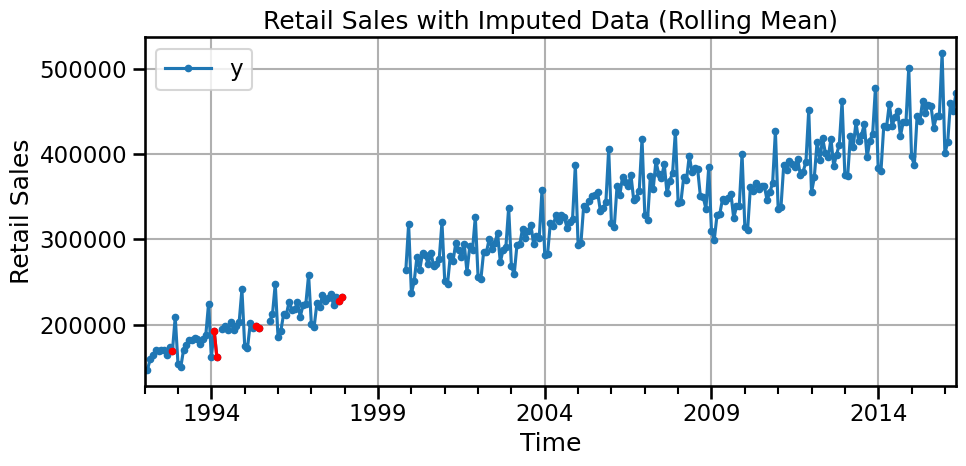

<Figure size 1000x500 with 0 Axes>

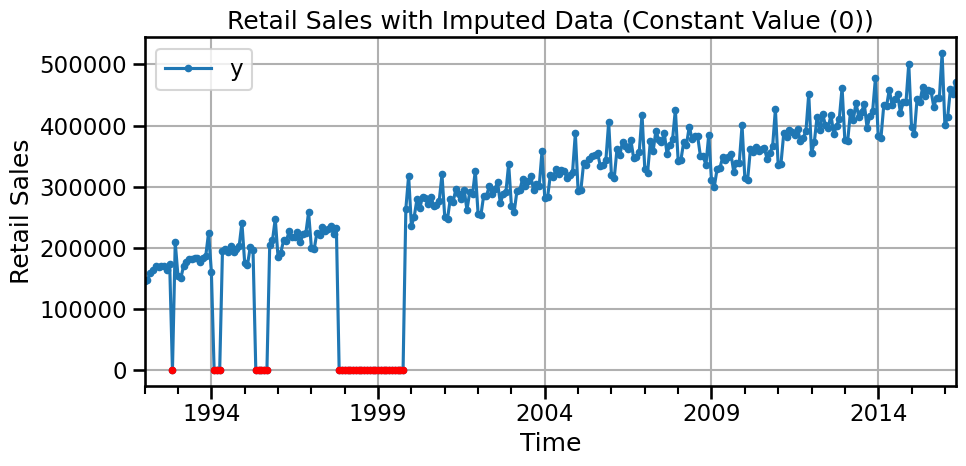

<Figure size 1000x500 with 0 Axes>

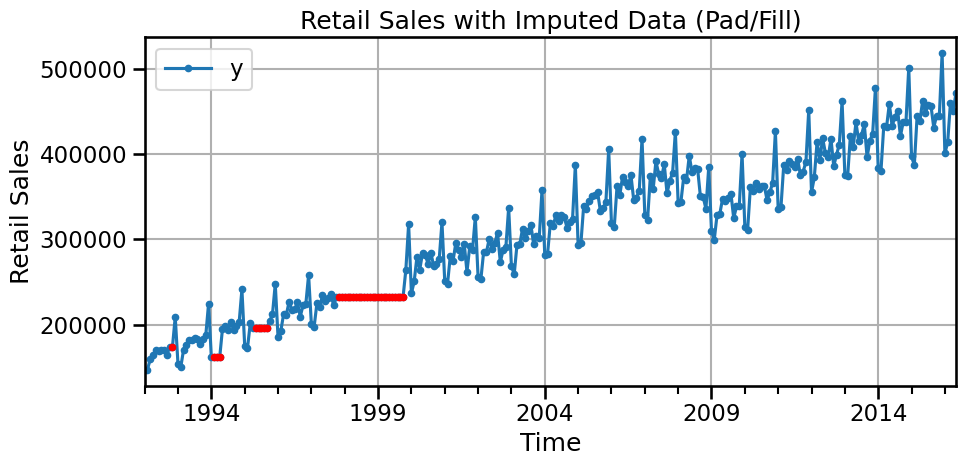

<Figure size 1000x500 with 0 Axes>

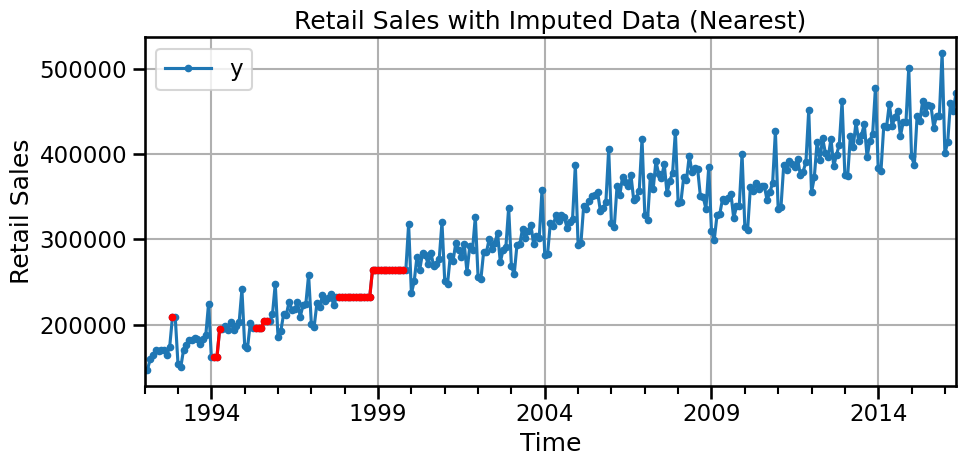

<Figure size 1000x500 with 0 Axes>

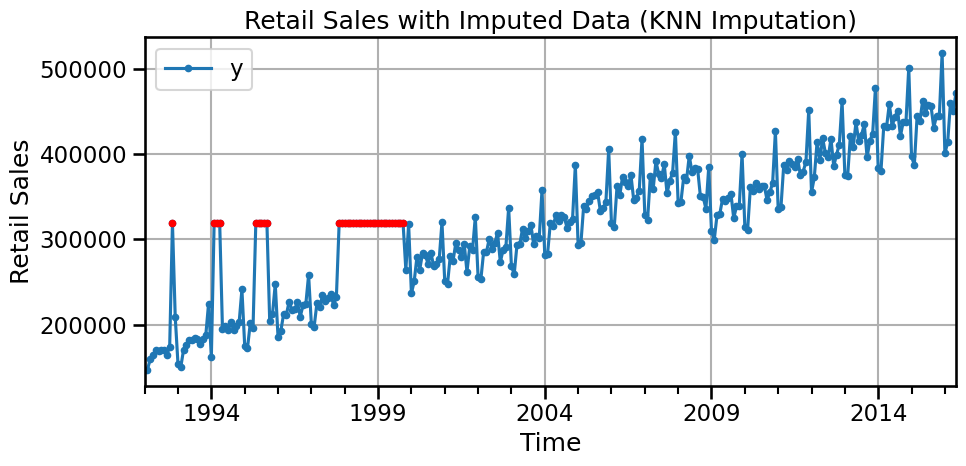

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Read the CSV file
df = pd.read_csv(
    "example_retail_sales_with_missing_data.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

# Drop the unnecessary column
df = df.drop(columns=["Unnamed: 0"])

# Display the first few rows
print(df.head())

# Count and display the number of missing values
n_missing = df["y"].isnull().sum()
print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'], marker='.')
plt.title('Retail Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop rows with NaT in index if there are any
df_cleaned = df.dropna()

# Reindex to fill missing dates freq='MS' (Month Start)
date_range = pd.date_range(start=df_cleaned.index.min(), end=df_cleaned.index.max(), freq='MS')
df_reindexed = df_cleaned.reindex(date_range)

# Fill methods
methods = {
    "Polynomial Interpolation": df_reindexed.interpolate(method='polynomial', order=2),
    "Mean Imputation": df_reindexed.fillna(df_reindexed.mean()),
    "Median Imputation": df_reindexed.fillna(df_reindexed.median()),
    "Mode Imputation": df_reindexed.apply(lambda x: x.fillna(x.mode()[0])),
    "Rolling Mean": df_reindexed.fillna(df_reindexed.rolling(window=3, min_periods=1).mean()),
    "Constant Value (0)": df_reindexed.fillna(0),
    "Pad/Fill": df_reindexed.fillna(method='pad'),
    "Nearest": df_reindexed.interpolate(method='nearest'),
}

# KNN Imputation
imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_reindexed), index=df_reindexed.index, columns=df_reindexed.columns)
methods["KNN Imputation"] = df_knn_imputed

# Plot the imputed time series for each method
for method, df_imputed in methods.items():
    plt.figure(figsize=[10, 5])
    ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
    df_imputed[df_reindexed.isnull()].plot(ax=ax, legend=None, marker=".", color="r")
    ax.set_title(f"Retail Sales with Imputed Data ({method})")
    ax.set_ylabel("Retail Sales")
    ax.set_xlabel("Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
